C:\Users\DELL\AppData\Local\Temp\ipykernel_21108\229338406.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(X_scaled)


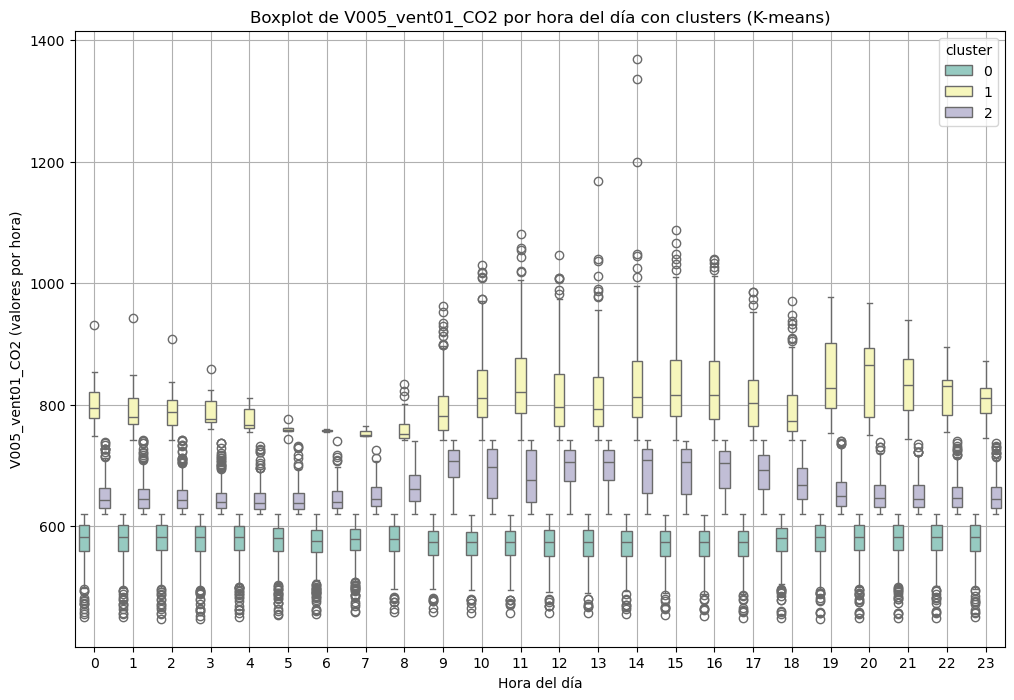

Resumen de V005_vent01_CO2 por cluster:
cluster
0    575.771843
1    819.718730
2    664.878141
Name: V005_vent01_CO2, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_21108\229338406.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(X_scaled)


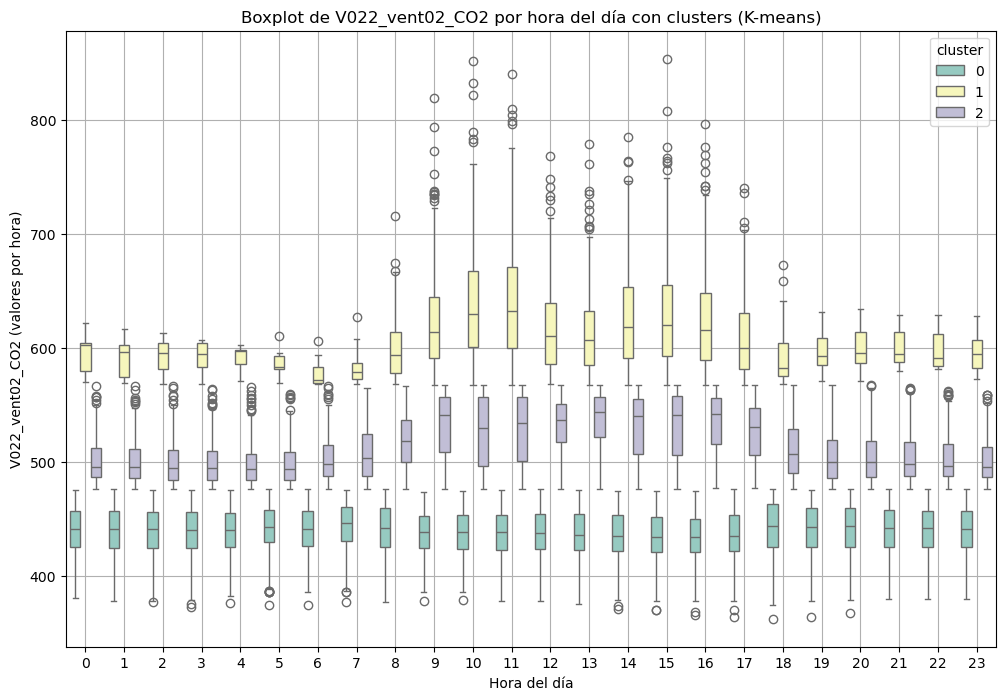

Resumen de V022_vent02_CO2 por cluster:
cluster
0    440.061669
1    623.685563
2    512.688223
Name: V022_vent02_CO2, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_21108\229338406.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(X_scaled)


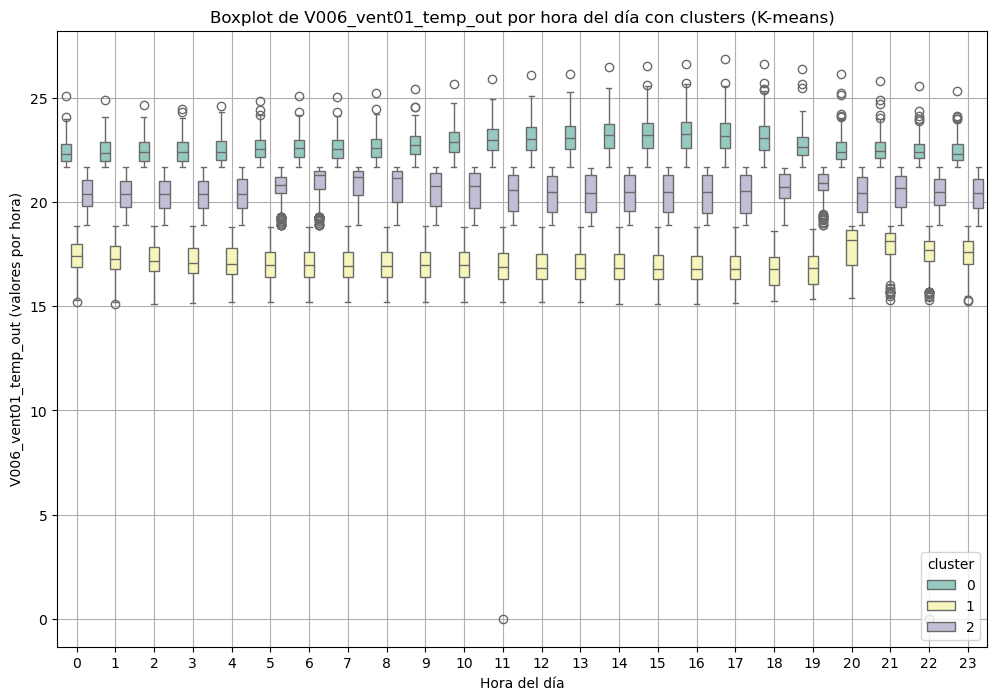

Resumen de V006_vent01_temp_out por cluster:
cluster
0    22.876492
1    17.252838
2    20.499664
Name: V006_vent01_temp_out, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_21108\229338406.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(X_scaled)


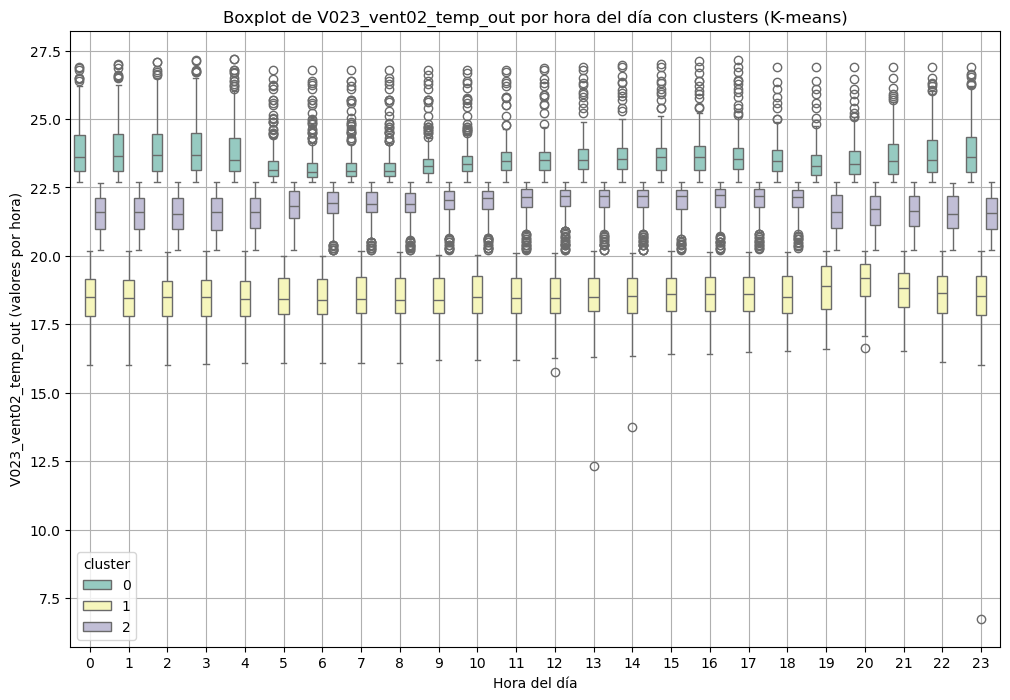

Resumen de V023_vent02_temp_out por cluster:
cluster
0    23.555294
1    18.548755
2    21.790683
Name: V023_vent02_temp_out, dtype: float64


In [5]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar el dataset correctamente con el delimitador ";"
df = pd.read_csv('data(1).csv', delimiter=';')

# Convertir la columna de timestamp a formato de fecha y extraer la hora del día
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d.%m.%Y %H:%M', errors='coerce')  # Manejar fechas no válidas
df['hour'] = df['timestamp'].dt.hour  # Extraer la hora (0 a 23)

# Seleccionar las columnas de interés (niveles de CO2 y temperatura)
columns_of_interest = ['V005_vent01_CO2', 'V022_vent02_CO2', 'V006_vent01_temp_out', 'V023_vent02_temp_out']

# 2. Eliminar filas con valores faltantes (NaN)
df_clean = df.dropna(subset=columns_of_interest)

n_clusters = 3

# Crear una función que aplique K-means y visualice Boxplots por hora para cada variable
def apply_kmeans_and_boxplot_by_hour(df, column, n_clusters):
    # 3. Estandarizar la variable individual
    scaler = StandardScaler()
    X = df[[column]]
    X_scaled = scaler.fit_transform(X)

    # 4. Aplicar K-means a la variable individual
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['cluster'] = kmeans.fit_predict(X_scaled)

    # 5. Visualización de los clusters para la variable individual (boxplot por hora)
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='hour', y=column, hue='cluster', data=df, palette='Set3')
    plt.title(f"Boxplot de {column} por hora del día con clusters (K-means)")
    plt.xlabel("Hora del día")
    plt.ylabel(f"{column} (valores por hora)")
    plt.xticks(range(0, 24))  # Mostrar todas las horas de 0 a 23
    plt.grid(True)
    plt.show()

    # 6. Resumen de los promedios por cluster
    print(f"Resumen de {column} por cluster:")
    print(df.groupby('cluster')[column].mean())

# Aplicar K-means a cada variable individualmente y mostrar boxplots
for column in columns_of_interest:
    apply_kmeans_and_boxplot_by_hour(df_clean, column, n_clusters)
